In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('/content/healthcare_data (1).csv')
print(df.head()) # Display the first few rows of the DataFrame


   PatientID  Age  BloodPressure  SugarLevel      Weight
0          1   44            118   87.892495  105.568034
1          2   39            109  177.321803  105.703426
2          3   49            149  144.148273   77.787070
3          4   58            121   90.355404  115.244784
4          5   35            109  126.421800   70.383790


In [19]:
# Data Cleaning
# Remove duplicates
df = df.drop_duplicates()


# Handle missing values
df = df.dropna()


In [20]:
## Remove outliers using IQR
for col in ['Age', 'BloodPressure', 'SugarLevel', 'Weight']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

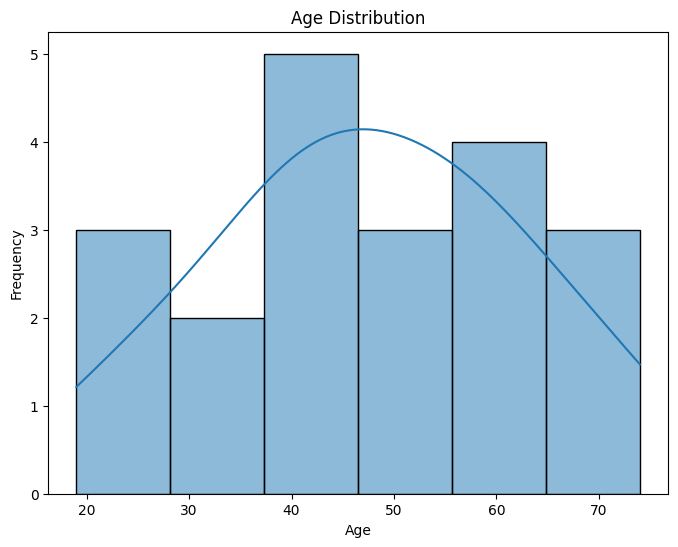

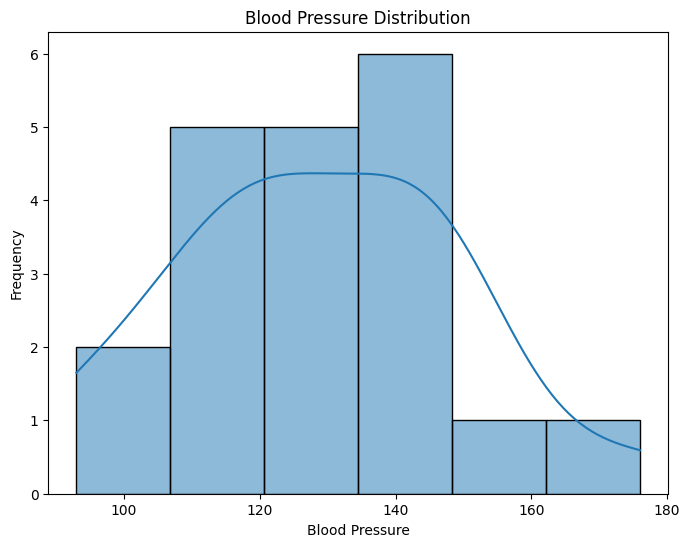

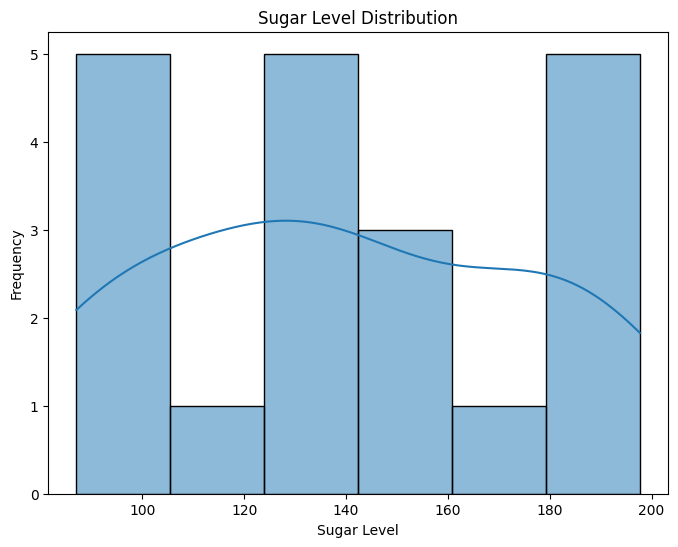

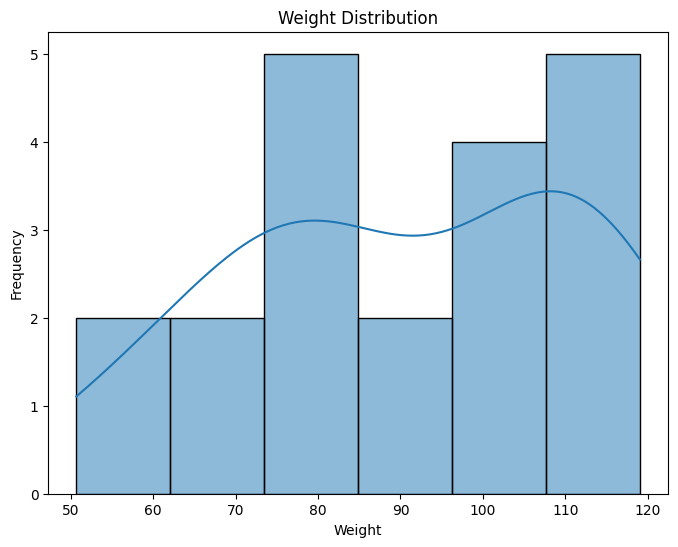

In [21]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Blood Pressure distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['BloodPressure'], kde=True)
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.show()

# Sugar Level distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['SugarLevel'], kde=True)
plt.title('Sugar Level Distribution')
plt.xlabel('Sugar Level')
plt.ylabel('Frequency')
plt.show()

# Weight distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Weight'], kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()


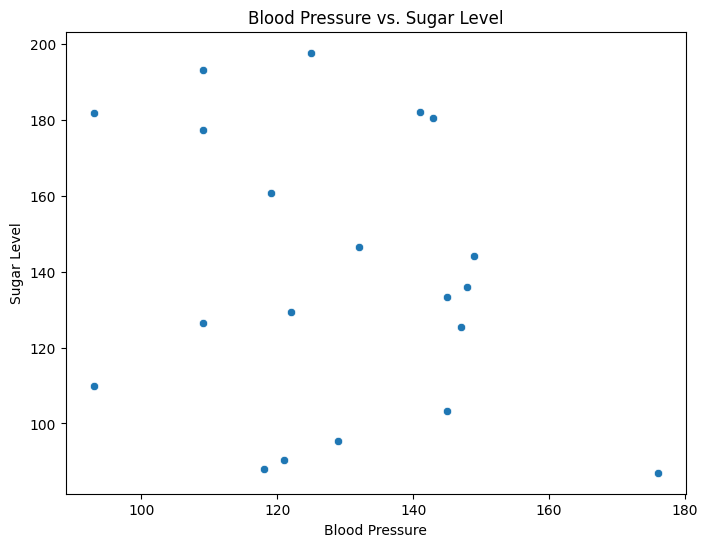

In [22]:
# Scatter plot of Blood Pressure vs Sugar Level
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BloodPressure', y='SugarLevel', data=df)
plt.title('Blood Pressure vs. Sugar Level')
plt.xlabel('Blood Pressure')
plt.ylabel('Sugar Level')
plt.show()

In [23]:
# Select features for clustering (Blood Pressure and Sugar Level)
X = df[['BloodPressure', 'SugarLevel']]

# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


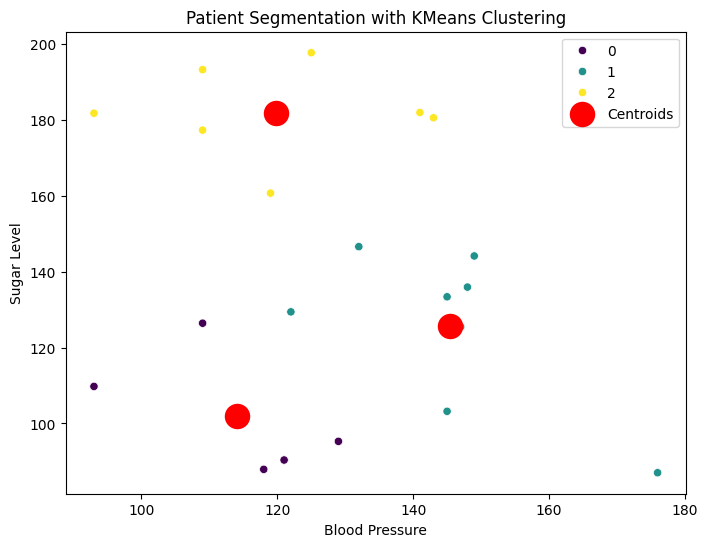

In [24]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BloodPressure', y='SugarLevel', hue='Cluster', data=df, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Patient Segmentation with KMeans Clustering')
plt.xlabel('Blood Pressure')
plt.ylabel('Sugar Level')
plt.legend()
plt.show()

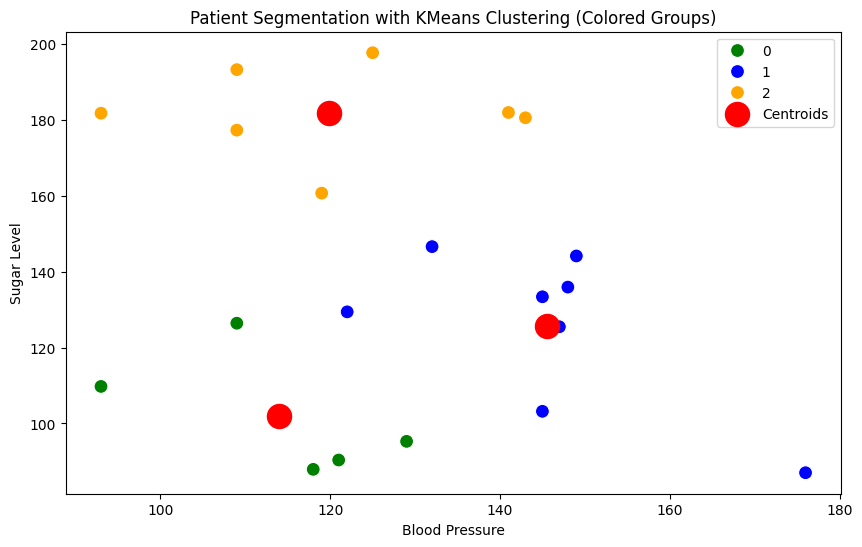

In [25]:
# Another visualization with customized colors
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BloodPressure', y='SugarLevel', hue='Cluster', data=df, palette=['green', 'blue', 'orange'], s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Patient Segmentation with KMeans Clustering (Colored Groups)')
plt.xlabel('Blood Pressure')
plt.ylabel('Sugar Level')
plt.legend()
plt.show()
